#**<font color='blue'><b>Lab-02 Linear Regression With One Variable**

> Indented block





In the first part of the exercise, we're tasked with implementing linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

**Let's start by importing some libraries and examining the data.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# means display graph just below the command

In [ ]:
# from google.colab import files
# files.upload()


In [ ]:
data = pd.read_csv("/content/ex1data1.csv",names=['Population',"Profit"])

In [ ]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
data.shape

(97, 2)

In [ ]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [ ]:
!pip install skimpy
import skimpy
# Assuming your DataFrame is named 'data'
skimpy.skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 97     │ │ float64     │ 2     │                                                          │
│ │ Number of columns │ 2      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %   ┃ mean    ┃ sd     ┃ p0       ┃ p25     ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Population     │   0 │      0 │    8.16 │   3.87 │    5.027 │   5.708 │  6.589 │  8.578 │   22.2 │ ▇▂▁  ▁  │  │
│ │ Profit         │   0 │      0 │   5.839 │   5.51 │   -2.681 │   1.987 │  4.562 │  7.047 │  24.15 │ ▃▇▃▁▁▁  │  │
│ └────────────────┴─────┴────────┴─────────┴────────┴──────────┴─────────┴────────┴────────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
data.isnull().sum()

,0
Population,0
Profit,0


In [ ]:
data.corr()

,Population,Profit
Population,1.000000,0.837873
Profit,0.837873,1.000000


In [ ]:
data.insert(0,"Ones",1)

<Axes: xlabel='Population', ylabel='Profit'>

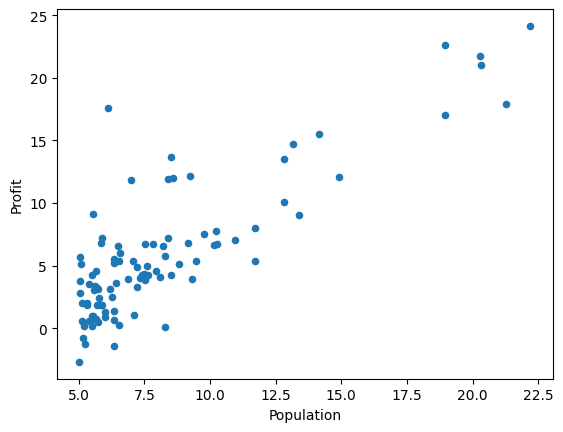

In [ ]:
data.plot(kind='scatter',x='Population',y='Profit')

In [ ]:
col = data.shape[1]
X = data.iloc[:,:-1]
y = data.iloc[:,col-1:col]

In [ ]:
col

3

In [ ]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [ ]:
X.shape

(97, 2)

In [ ]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [ ]:
y.shape

(97, 1)

In [ ]:
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(np.array([0,0]))

In [ ]:
theta.shape, X.shape,y.shape

((1, 2), (97, 2), (97, 1))

In [ ]:
def computeCost(X, y, theta):
  inner = np.power(((X*theta.T)-y),2)
  m = X.shape[0]
  cost = np.sum(inner)/(2*len(X))
  return cost



In [ ]:
computeCost(X,y,theta)

32.072733877455676

In [ ]:
def gradientDescent(X, y, theta, alpha, iters):

  temp = np.matrix(np.zeros(theta.shape))

  para = int(theta.ravel().shape[1])
  Cost = np.zeros(iters)
  for i in range(iters):
    error = (X*theta.T)-y
    for j in range(para):
      term = np.multiply(error,X[:,j])
      temp[0,j] = theta[0,j] - ((alpha/len(X))*np.sum(term))
    theta = temp
    Cost[i] = computeCost(X,y,theta)
  return theta , Cost

In [ ]:
alpha=0.02
iters =1000

In [ ]:
Theta, C = gradientDescent(X, y, theta, alpha, iters)

In [ ]:
computeCost(X, y, Theta)

4.478020743321126

Text(0.5, 1.0, 'Cost vs Iteration')

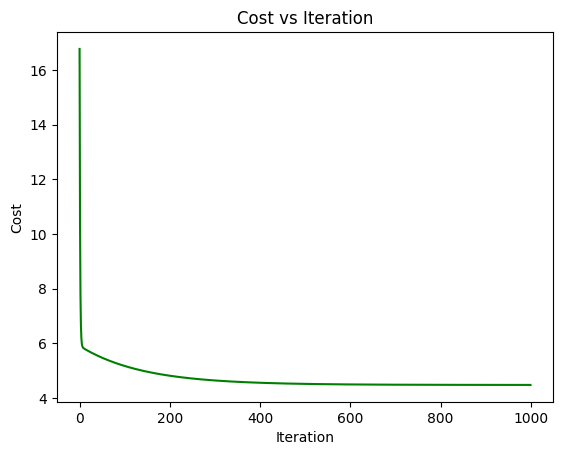

In [ ]:
# ploting Cost vs Iteration graph
iter = np.arange(0,1000,1)

# plt.plot(np.arange(iters),C)

plt.plot(iter,C,'g')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')

Text(0.5, 1.0, 'iteration=1000 LR =0.01')

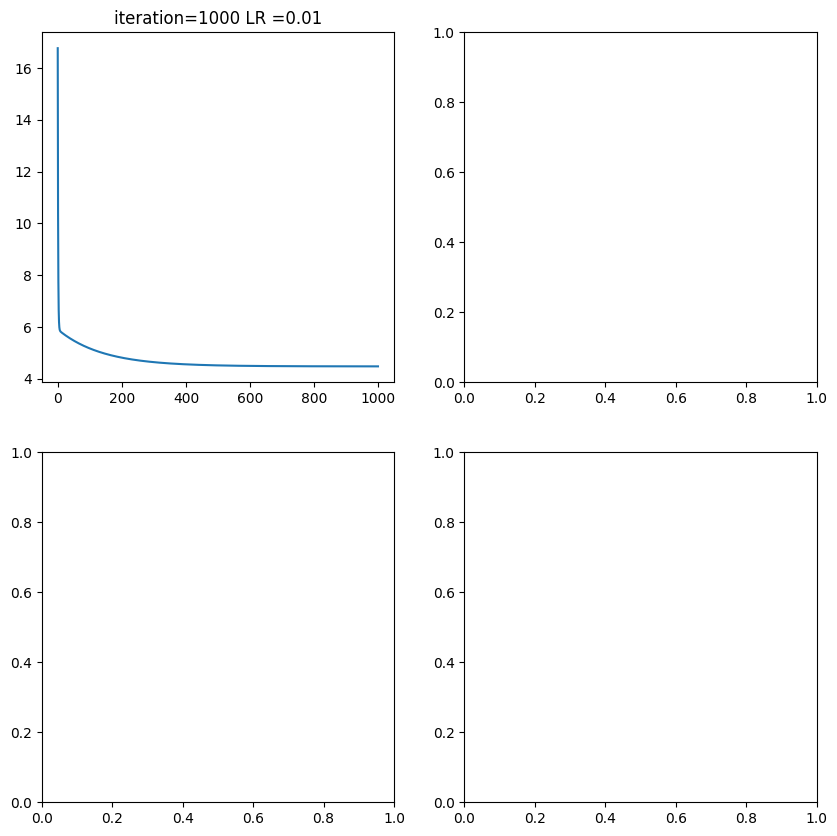

In [ ]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

ax1.plot(np.arange(iters),C)
ax1.set_title('iteration=1000 LR =0.01')




**Lab-01(b) Linear Regression with multiple Variables**

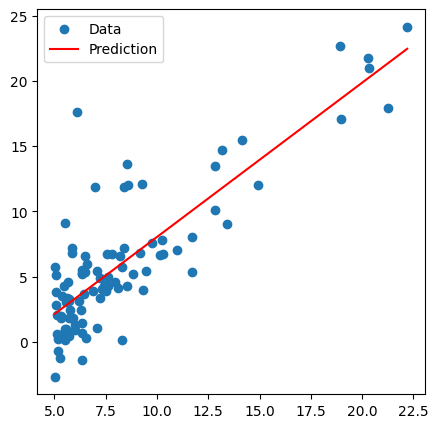

In [ ]:
x = np.linspace(data.Population.min(),data.Population.max(),1000)
h = Theta[0,0] + Theta[0,1]*x

fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(data.Population,data.Profit,label='Data')
ax.plot(x,h,'r',label='Prediction')
ax.legend(loc=2)

In [ ]:
data.Population.max()

22.203

Multiple Linear Regression

In [ ]:
data = pd.read_csv('/content/ex1data2.csv',names=['Area','NO. of Bed Room','Price'])

In [ ]:
data.head()

,Area,NO. of Bed Room,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
data.describe()

,Area,NO. of Bed Room,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [ ]:
data.isnull().sum()

,0
Area,0
NO. of Bed Room,0
Price,0


In [ ]:
data.insert(0,"Ones",1)

In [ ]:
x = data.iloc[:,:3]
y = data.iloc[:,3:4]

In [ ]:
y.head()

,Price
0,399900
1,329900
2,369000
3,232000
4,539900


In [ ]:
x.head()

,Ones,Area,NO. of Bed Room
0,1,2104,3
1,1,1600,3
2,1,2400,3
3,1,1416,2
4,1,3000,4


In [ ]:
X = np.matrix(x)
y = np.matrix(y)
theta = np.matrix(np.array([0,0,0]))


In [ ]:
X.shape , y.shape, theta.shape

((47, 3), (47, 1), (1, 3))

In [ ]:
computeCost(X,y,theta)

65591548106.45744

In [ ]:
X.shape, y.shape, theta.shape

((47, 3), (47, 1), (1, 3))

In [ ]:
alpha = 0.1
iter = 1000

In [ ]:
Theta, C = gradientDescent(X, y, theta,alpha, iter)

<ipython-input-40-bca8c55e68c7>:2: RuntimeWarning: overflow encountered in power
  inner = np.power(((X*theta.T)-y),2)
<ipython-input-42-20a71ae3dbc5>:10: RuntimeWarning: overflow encountered in multiply
  term = np.multiply(error,X[:,j])
<ipython-input-42-20a71ae3dbc5>:11: RuntimeWarning: invalid value encountered in scalar subtract
  temp[0,j] = theta[0,j] - ((alpha/len(X))*np.sum(term))


In [ ]:
Theta

matrix([[nan, nan, nan]])

In [ ]:
computeCost(X,y,Theta)

nan